In [1]:
!pip install dash plotly

In [1]:
import math
import pandas as pd

# 定義Haversine公式來計算兩個經緯度點之間的距離
def haversine(lon1, lat1, lon2, lat2):
    # 將經緯度轉換為弧度
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine公式
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # 地球半徑 (公里)
    r = 6371.0
    
    return c * r

# 定義城市和它們的經緯度
cities = {
    "Taipei Railway Station": (25.04735402, 121.5212559),
    "Hsinchu Railway Station": (24.80054011, 120.9751285),
    "Taichung Railway Station": (24.13598482, 120.6906735),
    "Douliu Railway Station": (23.71144621, 120.5467891),
    "Kaohsiung Railway Station": (22.63979774, 120.3063599),
    "Hualien Yuli": (23.38949415, 121.3828704),
    "Taitung Zhiben": (22.69347212, 121.0183315)
}

# 建立一個距離矩陣
city_names = list(cities.keys())
distance_matrix = pd.DataFrame(index=city_names, columns=city_names)

# 計算每個城市之間的距離並填入矩陣
for city1 in cities:
    for city2 in cities:
        if city1 == city2:
            distance_matrix.loc[city1, city2] = 0
        else:
            lon1, lat1 = cities[city1]
            lon2, lat2 = cities[city2]
            distance_matrix.loc[city1, city2] = haversine(lon1, lat1, lon2, lat2)

# 打印距離矩陣
print(distance_matrix)


                          Taipei Railway Station Hsinchu Railway Station  \
Taipei Railway Station                         0               62.372984   
Hsinchu Railway Station                62.372984                       0   
Taichung Railway Station              106.161303               49.344195   
Douliu Railway Station                132.681375               78.132231   
Kaohsiung Railway Station             192.760027              143.252571   
Hualien Yuli                           97.409206               93.023632   
Taitung Zhiben                        146.909963              120.750099   

                          Taichung Railway Station Douliu Railway Station  \
Taipei Railway Station                  106.161303             132.681375   
Hsinchu Railway Station                  49.344195              78.132231   
Taichung Railway Station                         0              28.879984   
Douliu Railway Station                   28.879984                      0   
Kaohsi

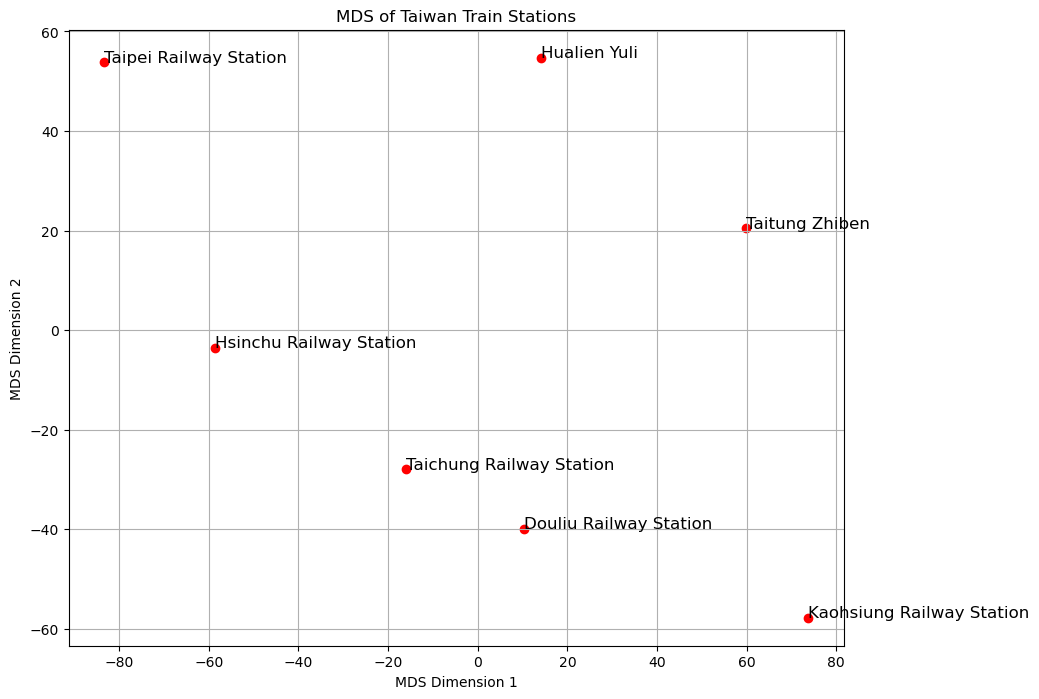

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# 使用MDS方法將距離矩陣降到2維
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
mds_results = mds.fit_transform(distance_matrix)

# 反转x轴和y轴（左右翻转和上下翻转）
mds_results[:, 0] = -mds_results[:, 0]
mds_results[:, 1] = -mds_results[:, 1]

# 繪製結果
plt.figure(figsize=(10, 8))
plt.scatter(mds_results[:, 0], mds_results[:, 1], color='red')

# 添加城市標籤
for i, city in enumerate(city_names):
    plt.text(mds_results[i, 0], mds_results[i, 1], city, fontsize=12)

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS of Taiwan Train Stations')
plt.grid(True)
plt.show()


In [17]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
from sklearn.manifold import MDS
import math

# Haversine formula to calculate distance between two latitude-longitude points
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371.0  # Earth radius in kilometers
    return c * r

# Define cities and their latitude-longitude coordinates
cities = {
    "Taipei Railway Station": (25.04735402, 121.5212559),
    "Hsinchu Railway Station": (24.80054011, 120.9751285),
    "Taichung Railway Station": (24.13598482, 120.6906735),
    "Douliu Railway Station": (23.71144621, 120.5467891),
    "Kaohsiung Railway Station": (22.63979774, 120.3063599),
    "Hualien Yuli": (23.38949415, 121.3828704),
    "Taitung Zhiben": (22.69347212, 121.0183315)
}

# Create a distance matrix
city_names = list(cities.keys())
distance_matrix = pd.DataFrame(index=city_names, columns=city_names)

# Compute distances between each pair of cities and fill in the matrix
for city1 in cities:
    for city2 in cities:
        if city1 == city2:
            distance_matrix.loc[city1, city2] = 0
        else:
            lon1, lat1 = cities[city1]
            lon2, lat2 = cities[city2]
            distance_matrix.loc[city1, city2] = haversine(lon1, lat1, lon2, lat2)

# Use MDS to reduce the distance matrix to 2 dimensions
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
mds_results = mds.fit_transform(distance_matrix)

# Reverse x and y axes (flip left-right and up-down)
mds_results[:, 0] = -mds_results[:, 0]
mds_results[:, 1] = -mds_results[:, 1]

# Initialize the Dash app
app = dash.Dash(__name__)

# Create a scatter plot to display the MDS results
fig = px.scatter(
    x=mds_results[:, 0],
    y=mds_results[:, 1],
    text=city_names,
    hover_name=city_names
)

fig.update_traces(textposition='top center')

# Set up the layout
app.layout = html.Div(children=[
    html.H1(children='Taiwan Train Stations'),
    html.Div(children='''
        MDS of Taiwan Train Stations
    '''),

    dcc.Graph(
        id='train-stations-map',
        figure=fig,
        config={'staticPlot': False, 'displayModeBar': True}
    ),

    html.Div(id='selected-point-info')
])

@app.callback(
    Output('selected-point-info', 'children'),
    [Input('train-stations-map', 'selectedData')]
)
def display_selected_data(selectedData):
    if selectedData is not None:
        selected_points = selectedData['points']
        if selected_points:
            return html.Div([
                html.H4("Selected Cities:"),
                html.Ul([
                    html.Li([
                        html.Span(f"City: {point['text']}, "),
                        html.Span(f"X: {point['x']:.2f}, "),
                        html.Span(f"Y: {point['y']:.2f}")
                    ]) for point in selected_points
                ])
            ])
    return html.Div()

if __name__ == '__main__':
    app.run_server(debug=True)
